In [43]:
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib.pyplot as plt
psivals = np.linspace(-5,5,31)#Values of Psi
phivals = np.linspace(-15,15,31)#Values of Phi
U = 2 #Freestream velocity
lam = 2 #Doublet strength
#Above two imply that radius of cylinder, a = 1
k1 = 3 #Vortex strength corresponding to beta = k1/(Ua) < 2
k2 = 4 #Vortex strength corresponding to beta = k2/(Ua) = 2
k3 = 5 #Vortex strength corresponding to beta = k3/(Ua) > 2

In [35]:
def draw_arrows1(x,y,arrow1,arrow2,arrow3,arrow4):
    #Function for drawing arrows on streamlines having one y value for one x value
    plt.annotate("", xy=(x[arrow1], y[arrow1]), xytext=(x[arrow1-1], y[arrow1-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
    plt.annotate("", xy=(x[arrow2], y[arrow2]), xytext=(x[arrow2-1], y[arrow2-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
    plt.annotate("", xy=(x[arrow3], y[arrow3]), xytext=(x[arrow3-1], y[arrow3-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
    plt.annotate("", xy=(x[arrow4], y[arrow4]), xytext=(x[arrow4-1], y[arrow4-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
def draw_arrows2(x,y,arrow1,arrow2,arrow3,arrow4):
    #Function for drawing arrows on streamlines having more than one y value for one x value
    plt.annotate("", xy=(x[arrow1], y[arrow1]), xytext=(x[arrow1-1], y[arrow1-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
    plt.annotate("", xy=(x[arrow2], y[arrow2]), xytext=(x[arrow2-1], y[arrow2-1]),
        arrowprops=dict(arrowstyle="->" , color = 'b'))
    plt.annotate("", xy=(-x[arrow3], y[arrow3]), xytext=(-x[arrow3-1], y[arrow3-1]),
        arrowprops=dict(arrowstyle="<-" , color = 'b'))
    plt.annotate("", xy=(-x[arrow4], y[arrow4]), xytext=(-x[arrow4-1], y[arrow4-1]),
        arrowprops=dict(arrowstyle="<-" , color = 'b'))

In [36]:
def stream1(psivals,x_range,k,arrow1,arrow2,arrow3,arrow4):#Function for drawing streamlines having one y value for one x value
    for j in psivals:
        yps=[]
        for i in x_range:
            def solveps(y):
                return j - U*y + lam*y/(i**2 + y**2) + k*np.log(np.sqrt(i**2 + y**2))
            if k == 0:
                z = fsolve(solveps,j)
                if i**2 + z**2 < 1:
                    z = np.nan
            if k == 3:
                if i>x_range[0] :
                    z = fsolve(solveps,yps[-1] - 0.001)
                else:
                    z = fsolve(solveps,j)
            yps.append(z)
        plt.plot(x_range , yps , 'b' , linewidth = 0.75)
        draw_arrows1(x_range,yps,arrow1,arrow2,arrow3,arrow4)

In [37]:
def stream2(psivals,x_range,k,exclude,arrow1,arrow2,arrow3,arrow4):
    #Function for drawing streamlines having more than one y value for one x value
    yfirst=[]
    ymins=[]
    for j in range(len(psivals)):
        yps=[]
        for i in x_range:
            def solveps(y):
                return psivals[j] - U*y + lam*y/(i**2 + y**2) + k*np.log(np.sqrt(i**2 + y**2))
            if i>x_range[0]:
                z = fsolve(solveps,yps[-1]-.0001)
            else:
                z = fsolve(solveps,psivals[j])
            if j in exclude and i == x_range[0]:
                yfirst.append(z)
            if j in exclude:
                z = np.nan
            yps.append(z)
        ymins.append(np.min(yps))
        plt.plot(x_range , yps , 'b' , linewidth = 0.75)
        draw_arrows1(x_range,yps,arrow1,arrow2,arrow3,arrow4)
        
    for j in exclude:
        xextra=[]
        yextra=[]
        if j == 15 and k == 4:
            ymins[14]=1
        for i in np.linspace(yfirst[j-exclude[0]],ymins[j-1],81):
            def solveps(x):
                return psivals[j] - U*i + lam*i/(i**2 + x**2) + k*np.log(np.sqrt(i**2 + x**2))
            if i>yfirst[j-exclude[0]]:
                z = fsolve(solveps,xextra[-1] - .001)
            else:
                z = fsolve(solveps,-6)
            if i**2 + z**2 < 1 and j!=15 and k == 4:
                z = xextra[-1]
            if i**2 + z**2 < 1:
                z = np.nan
            xextra.append(-1*abs(z))
            yextra.append(i)
            ymins[j]=np.min(yextra)

        if k == 4:
            del xextra[-1]
            del yextra[-1]    
            if j == 14:
                del xextra[-1]
                del yextra[-1]
            xextra.append(0)
            yextra.append(yextra[-1])
        if k == 5:
            if j == 13 or j == 12 or j == 11:
                del xextra[-1]
                del yextra[-1]
                del xextra[-1]
                del yextra[-1]
            xextra.append(0)
            yextra.append(yextra[-1]-.04*(14-j))
            
        plt.plot(np.array(xextra) , np.array(yextra) , 'b' , linewidth = 0.75)
        plt.plot(-np.array(xextra) , np.array(yextra) , 'b' , linewidth = 0.75)
        draw_arrows2(np.array(xextra),np.array(yextra),20-j,40-j,19-j,39-j)

In [38]:
#Function for drawing potential lines
def potential(phivals,j1,j2,arr,k):    
    for j in phivals:
        yph=[]
        if j <= j1 or j >= j2:
            for i in arr:
                def solveph(x):
                    return j - U*x - lam*x/(i**2 + x**2) - k*np.arctan(i/(x+.000000001))
                z = fsolve(solveph,j)
                if i**2 + z**2 < 1:
                    z = np.nan
                yph.append(z)
            plt.plot(yph , arr , 'r--' , linewidth = 0.5)

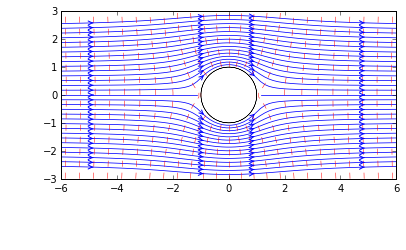

In [39]:
plt.xlim(-6,6)
plt.ylim(-3,3)
stream1(psivals,np.linspace(-6,6,80),0,8,-8,34,-34)#k=0 simulates cylinder with no rotation
potential(phivals,-0,0,np.linspace(-3,3,40),0)
t = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'k',linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')

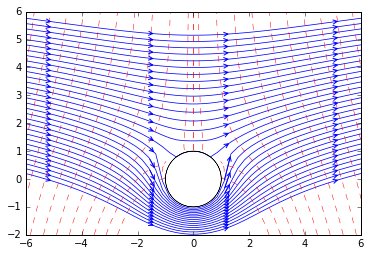

In [40]:
plt.xlim(-6,6)
plt.ylim(-2,6)
stream1(psivals,np.linspace(-6,6,50),k1,4,-4,19,-20)#k=k1=3 simulates rotating cylinder with 2 stagnation points   
potential(phivals,-4,4,np.linspace(-2,6,80),k1)
t = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'k',linewidth = 0.5)

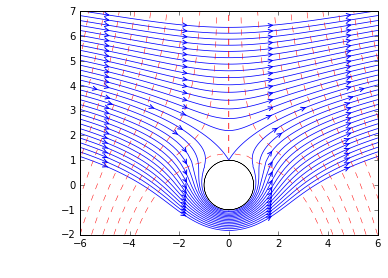

In [41]:
plt.xlim(-6,6)
plt.ylim(-2,7)
stream2(psivals,np.linspace(-6,6,81),k2,[13,14,15],8,29,-29,-8)#k=k2=4 simulates rotating cylinder with 1 stagnation point    
potential(phivals,-6,6,np.linspace(-2,8,80),k2)
t = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'k',linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')

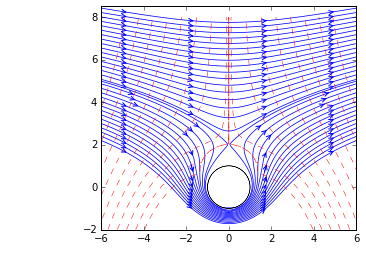

In [44]:
plt.xlim(-6,6)
plt.ylim(-2,8.5)
stream2(psivals,np.linspace(-6,6,81),k3,[11,12,13],8,29,-29,-8)#k=k3=5 simulates rotating cylinder with no stagnation point
xextra=[]
yextra=[]
    
for i in np.linspace(4.98,-1.133,81): #Adding that extra stream line 
    def solveps(x):
        return  -0.4666666679 - U*i + lam*i/(i**2 + x**2) + k3*np.log(np.sqrt(i**2 + x**2))
    if i>4.98:
        z = fsolve(solveps,xextra[-1] - .001)
    else:
        z = fsolve(solveps,-0.4)
    if i**2 + z**2 < 1:
        z = np.nan
    xextra.append(-1*abs(z))
    yextra.append(i)
    
del xextra[-1]
del yextra[-1] 
del xextra[-1]
del yextra[-1]
xextra.append(0)
yextra.append(yextra[-1])

plt.plot(np.array(xextra) , np.array(yextra) , 'b' , linewidth = 0.75)
plt.plot(-np.array(xextra) , np.array(yextra) , 'b' , linewidth = 0.75)

potential(phivals,-6,6,np.linspace(-2,8,80),k3)
t = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t),'k',linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')
